# Loan Prediction Problem

Find out the person is eligible to acquire loan based on their qualifications, employment, earning, dependent, their dependent’s income, credit history, their loan amount, and loan term. Create a machine learning model to generate loan approval from person’s information.

Dataset Source: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

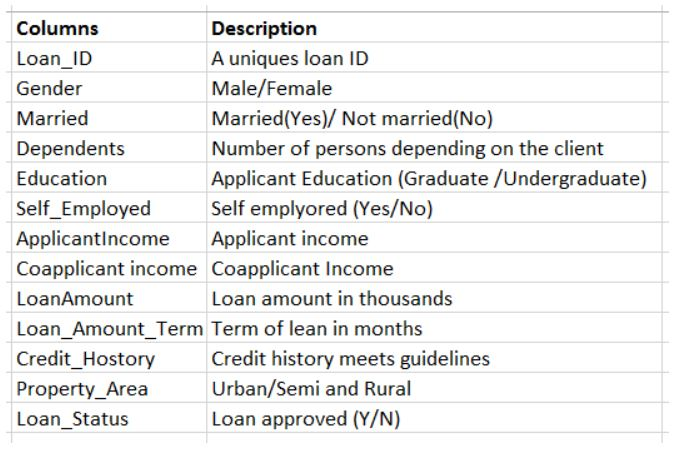

In [27]:
from IPython.display import Image
Image("AboutDataset.JPG")

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
ds_loan = pd.read_csv('train.csv')
ds_loan_test = pd.read_csv('test.csv')

# EDA on Train Dataset

In [30]:
ds_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [31]:
ds_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
ds_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Check null values and clean train dataset

In [33]:
ds_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Except for LoanAmount column, every other null containing attributes have two unique values so by using mode function I'll fill missing values.

For LoanAmount attribute I'll use median function to resolve null value problem

In [34]:
ds_loan['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [35]:
ds_loan['Gender'].fillna(ds_loan['Gender'].mode()[0], inplace = True)
ds_loan['Married'].fillna(ds_loan['Married'].mode()[0], inplace = True)
ds_loan['Dependents'].fillna(ds_loan['Dependents'].mode()[0], inplace = True)
ds_loan['Self_Employed'].fillna(ds_loan['Self_Employed'].mode()[0], inplace = True)
ds_loan['LoanAmount'].fillna(ds_loan['LoanAmount'].median(), inplace = True)
ds_loan['Loan_Amount_Term'].fillna(ds_loan['Loan_Amount_Term'].mode()[0], inplace = True)
ds_loan['Credit_History'].fillna(ds_loan['Credit_History'].mode()[0], inplace = True)

Training dataset after resolving missing values

In [36]:
ds_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:
ds_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Training dataset dont have any duplicated values in it

In [38]:
ds_loan.duplicated().sum()

0

Now I'll apply EDA and data cleaning on test dataset

# EDA on Test Dataset

In [39]:
ds_loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [40]:
ds_loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [41]:
ds_loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Check null values and clean train dataset test dataset

In [42]:
ds_loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [43]:
ds_loan_test['LoanAmount'].value_counts()

150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
186.0     1
163.0     1
360.0     1
77.0      1
297.0     1
Name: LoanAmount, Length: 144, dtype: int64

In [44]:
ds_loan_test['Gender'].fillna(ds_loan_test['Gender'].mode()[0], inplace = True)
ds_loan_test['Dependents'].fillna(ds_loan_test['Dependents'].mode()[0], inplace = True)
ds_loan_test['Self_Employed'].fillna(ds_loan_test['Self_Employed'].mode()[0], inplace = True)
ds_loan_test['LoanAmount'].fillna(ds_loan_test['LoanAmount'].median(), inplace = True)
ds_loan_test['Loan_Amount_Term'].fillna(ds_loan_test['Loan_Amount_Term'].mode()[0], inplace = True)
ds_loan_test['Credit_History'].fillna(ds_loan_test['Credit_History'].mode()[0], inplace = True)

In [45]:
ds_loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [46]:
ds_loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [47]:
ds_loan_test.duplicated().sum()

0

In [64]:
ds_loan.drop('Loan_ID',axis=1,inplace=True)
ds_loan_test.drop('Loan_ID',axis=1,inplace=True)
#checking the new shapes
print(f"training shape (row, col): {ds_loan.shape}\n\ntesting shape (row, col): {ds_loan_test.shape}")

training shape (row, col): (614, 12)

testing shape (row, col): (367, 11)


# Data Visualization

Creating collumns of all numerical and categorical columns, and dataset as well

In [65]:
#list of all the numeric columns
num = ds_loan.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = ds_loan.select_dtypes('object').columns.to_list()

#numeric dataset
ds_loan_num =  ds_loan[num]
#categoric dataset
ds_loan_cat = ds_loan[cat]

Comparing Loan status output, where loan acceptance racio is higher then rejection

C:\Users\Biraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

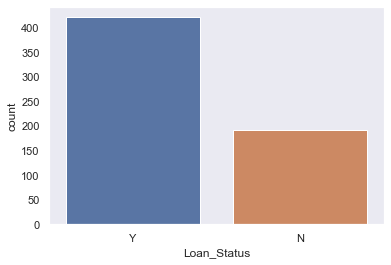

In [66]:
sns.countplot(ds_loan['Loan_Status'])

Histogram of all numerical data. We have got some interesting insights, they are mentioned below:

- in ApplicantIncome candidate have more income under 10000
- in CoappicantIncome have more income bar around 5000
- Candiate got more loan between 100 to 150
- They all applied for long term loan payment
- Most applicate have good credit history

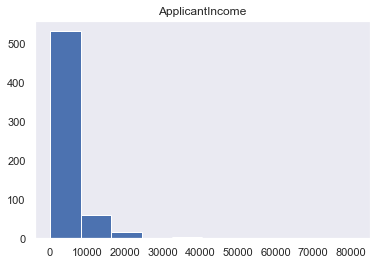

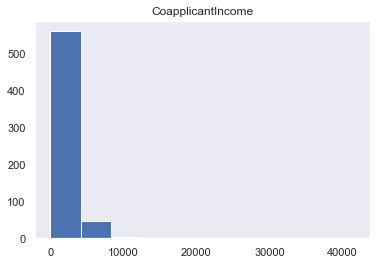

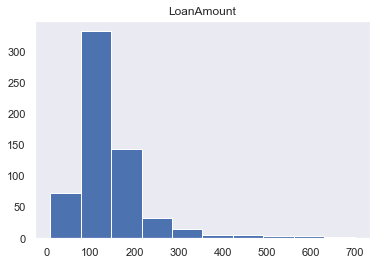

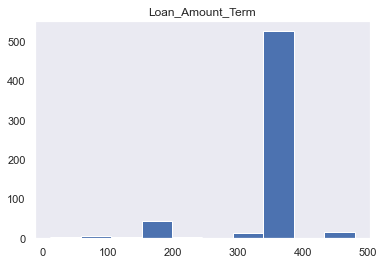

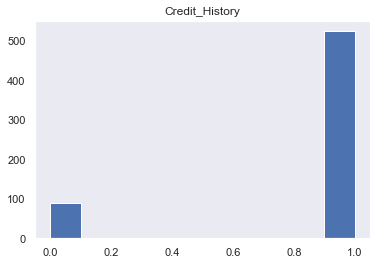

In [77]:
for a in ds_loan_num:
    plt.hist(ds_loan_num[a])
    plt.title(a)
    plt.show()

Bar comparition of all categorical type attributes with loan status, and their insights are mentioned below:

- It seems that male have applied more for loan and also got more rejected too
- Married couple have applied for loan than singles
- Less depended in family got good acceptance rate
- Loan company trust more on Gradate candidate and not self-employed(they want steady salary recored)
- There is not much difference with where candidate live, but suburban have got good acceptance rate.

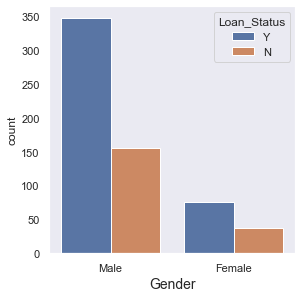

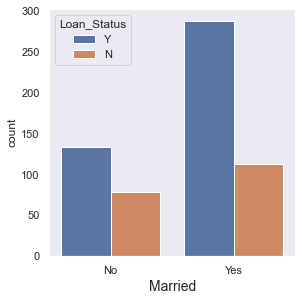

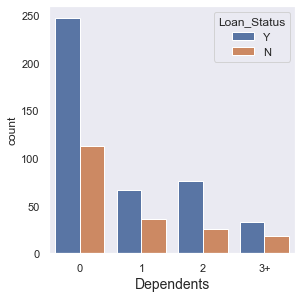

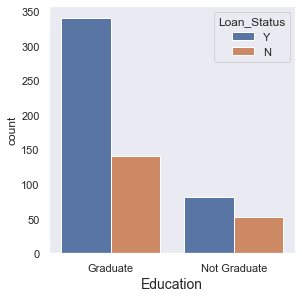

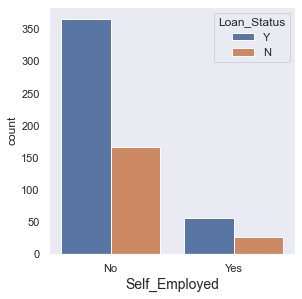

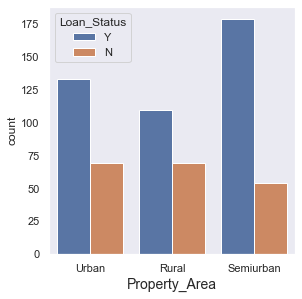

In [70]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=ds_loan )
    plt.xlabel(i, fontsize=14)

Converting Object data into numerical data to better understand data relations.

In [74]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
c = ['Gender', 'Married', 'Education', 
        'Self_Employed', 'Property_Area', 
        'Loan_Status', 'Dependents']
for i in c:
    ds_loan[i] = LE.fit_transform(ds_loan[i])

ds_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Correlation of all columns after changing categorical data into numerical

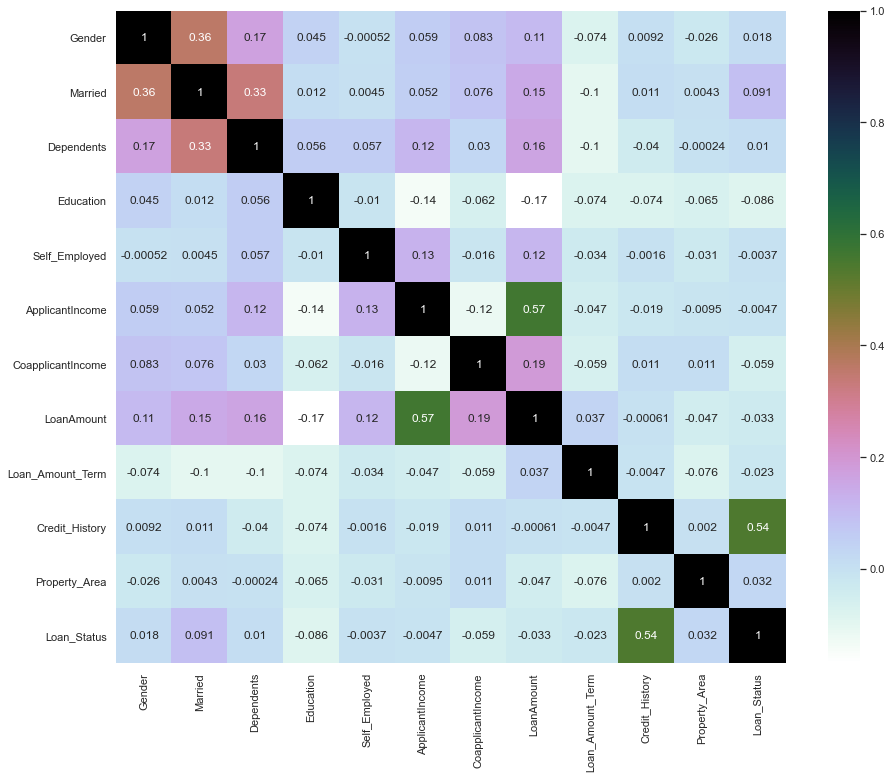

In [75]:
corr = ds_loan.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, cmap='cubehelix_r');